<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/decisionTree_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Last amended: 21st April, 2021
# Myfolder: D:\data\OneDrive\Documents\decision_trees
# Ref: https://towardsdatascience.com/a-guide-to-decision-trees-for-machine-learning-and-data-science-fe2607241956
# Objectives:
#            i) To quickly create a decision tree
#           ii) To see the decision tree


In [35]:
# 1.0 Call libraries

import numpy as np
import pandas as pd
import os

# 1.1 Call sklearn libraries
# 1.1.1 Convert target values from string to integers
from sklearn.preprocessing import LabelEncoder as le

# 1.1.2 Split data into train and test data
from sklearn.model_selection import train_test_split

# 1.1.3 PReprocessong:
from sklearn.preprocessing import StandardScaler

# 1.1.4 Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# 1.1.5 To draw decision tree
from sklearn.tree import export_graphviz

# 1.1.6 Import iris
from sklearn.datasets import load_iris

# 1.1.7
# Install as:
#   conda install -c conda-forge python-graphviz 
#   conda install -c anaconda pydot
import graphviz

# 1.1.8
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
# 1.2 For tree visualization

"""
Ref: https://stackoverflow.com/questions/33433274/anaconda-graphviz-cant-import-after-installation
Install on Anaconda using following two commands, as:

conda install python-graphviz

"""

In [2]:
# 1.3 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [12]:
# 2.0 Get iris dataset
data = load_iris()
type(data)    # sklearn.utils.Bunch
              # 'Bunch' is a dict that supports
              #  attribute-style access

sklearn.utils.Bunch

What is Bunch?  
Bunch is a subclass of the Dict class and supports all the methods as dict does. In addition, it allows you to use the keys as attributes. Bunch is just like dictionary but it supports attribute type access. 

In [56]:
# 2.1
X = data['data']                # Bunch being accessed like a dict
y = data['target']
col_names = data.feature_names  # Attribute like access
target_name = data.target_names # Attribute like access


'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [ ]:
print(data.DESCR)

In [22]:
# 2.2 Create a DataFrame
iris = pd.DataFrame(X,columns=col_names)
iris['target'] = y

In [28]:
# 2.3 Explore data:
iris.head()
print()
iris.shape   # (150, 5)
print()
iris.dtypes
print("\n\n---Distribution of target value ---\n")
iris['target'].value_counts()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


(150, 5)

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object



---Distribution of target value ---



2    50
1    50
0    50
Name: target, dtype: int64

In [30]:
# 2.4 Standardize data:
#     Even though, for a decision tree,
#     data standardization is not needed,
#     but make it a habit to do so:

# 2.4.1 Instantiate object
ss = StandardScaler()

# 2.4.2 Train object on data
ss.fit(X)

# 2.4.3 Trandform data
X = ss.transform(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
# 2.5 Split X and y into train and test data:

X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3
                                                    )

# 2.5.1 About train data:
                                   
X_train.shape  # (105,4)
print()

# 2.5.2 Test data:

X_test.shape   # (45,4)
print()

(105, 4)

(45, 4)

In [36]:
# 3. Start modeling
# 3.1 Initialize our decision tree object.
#     Supply relevant parameters

ct = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [37]:
# 3.2 Train our decision tree:

c_tree = ct.fit(X_train,y_train)

In [38]:
# 4.0 Make predictions of test data
y_te = ct.predict(X_test)

In [40]:
# 4.1 Get accuracy:

np.sum((y_test == y_te))/y_test.size

0.9555555555555556

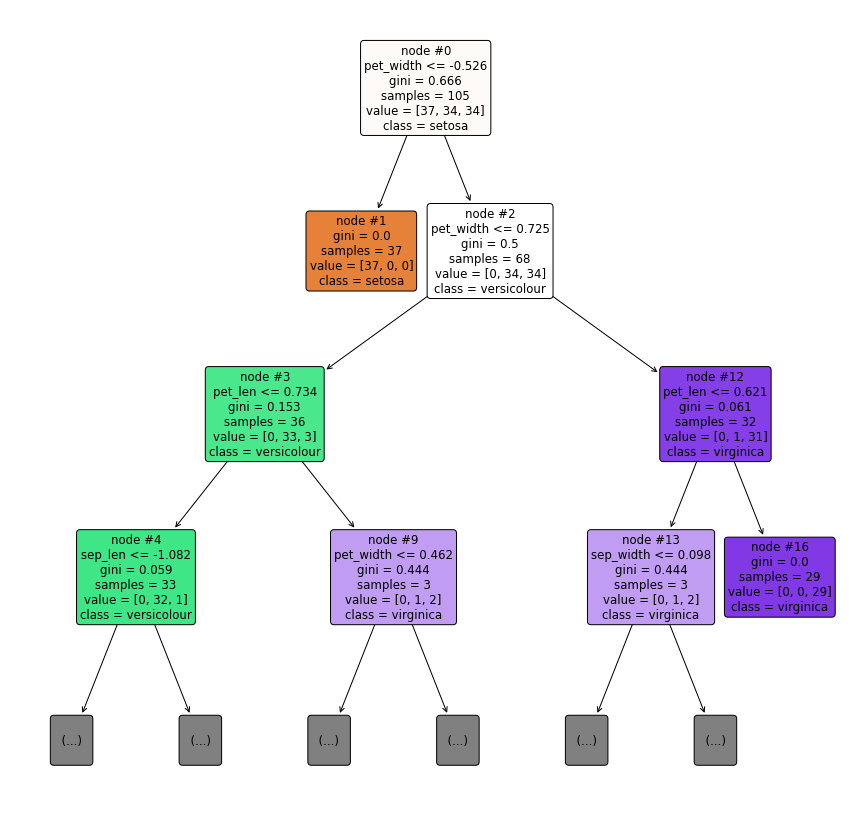

In [58]:
# 4.2
# Refer: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree
_=plt.figure(figsize=(15,15))
_=plot_tree(
            c_tree,
            max_depth = 3,
            rounded = True,
            filled = True,
            impurity = True,
            node_ids = True,
            feature_names = ["sep_len", "sep_width","pet_len","pet_width"],
            class_names = ["setosa","versicolour","virginica"]
            )

_=plt.show()

In [41]:
# 5.0 Which features are important:

fi = ct.feature_importances_
fi

array([0.01343088, 0.01906318, 0.04048218, 0.92702376])

In [31]:
# 5.1 Get a list:

list(zip(X.columns, fi))

AttributeError: ignored

In [32]:
######### Drop 'c2' and repeat above steps #############

# 6. Start modeling
# 6.1 Initialize our decision tree object
ct1 = dtree(
            criterion="gini",    # Alternative 'entropy'
            splitter="best",     # Alternative 'random'
            max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
            )

In [ ]:
# 6.2 Train our decision tree (tree induction + pruning)
ct1.fit(X_train[['c1', 'c3', 'c4']],y_tr)

In [ ]:
# 6.3 Now make prediction
out = ct1.predict(X_test[['c1', 'c3', 'c4']])
out

In [ ]:
# 6.4 Get accuracy
np.sum((out == y_te))/out.size

In [ ]:
# 7.0 Which features are important
fi = ct1.feature_importances_
fi
list(zip(X[['c1', 'c3', 'c4']].columns, fi))

In [33]:
# Ref: https://stackoverflow.com/a/46374279/3282777

feature_names=[ 'c1','c2','c3','c4']
class_names = ['setosa','versicolor', 'virginica']
dot_data = export_graphviz(c_tree, out_file=None,
                     feature_names=feature_names,
                     class_names=class_names,
                     filled=True, rounded=True,
                     special_characters=True)

# 3.1
graph = graphviz.Source(dot_data)

# 3.2 A pdf file is created in your current folder
graph.render("iris")

'iris.pdf'

In [ ]:
####### I am done ###########33